# EDA - Estado de Florida

En este archivo se realiza el EDA de los archivos en el directorio data/raw/google-maps/reviews-estados/review-Florida. Previamente tendrá que filtrarse con los datos del dataset de metadata-sitios procesado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys
from datetime import datetime, timedelta

# Ignorar advertencias
warnings.filterwarnings('ignore')

In [2]:
# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))

# Agregar la ruta del proyecto al sys.path para traer librerías personalizadas
sys.path.append(project_root)

In [3]:
# importar funciones personalizadas en src/utils
from src.utils.EDA import merge_files, get_frequency

## Extracción de Datos

In [4]:
# se guarda el directorio con los datasets en una variable
data_dir = os.path.join(project_root, 'data/raw/google_maps/reviews-estados/review-Florida')

# se utiliza la función merge_files para unir los archivos en un solo DataFrame
florida = merge_files(data_dir)

# Se verifica la estructura del DataFrame
florida.head(3)

Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\1.parquet
Archivo 1.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\10.parquet
Archivo 10.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\11.parquet
Archivo 11.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\12.parquet
Archivo 12.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\13.parquet
Archivo 13.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataSc

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.014719e+20,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,{'text': 'Thank you for the feedback. We would...,0x8893863ea87bd5dd:0x9383ebf973e74abb
1,1.154772e+20,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,{'text': 'Thank you for reaching out. I’m forw...,0x8893863ea87bd5dd:0x9383ebf973e74abb
2,1.018050e+20,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb


## Filtrar Reviews de Servicios Gastronómicos

In [5]:
# se guarda el directorio con el datasets de metadata procesado en una variable
data_dir = os.path.join(project_root, 'data/processed/google_maps/metadata_final.parquet')

# leer parquet y visualizar los primeros elementos
metadata = pd.read_parquet(data_dir)
metadata.head(3)

,name,address,gmap_id,latitude,longitude,avg_rating,num_of_reviews,category
0,10&10 Enoteca,"10&10 Enoteca, 2223 N Westshore Blvd unit B217...",0x88c2c3fba62158e5:0x2523a971ec5aecdf,27.965477,-82.520899,5.0,38,[wine bar]
1,4th Street Pizza,"4th Street Pizza, 3187 4th St N, St. Petersbur...",0x88c2e15d3b6d647b:0xebc778c2e5a83a24,27.801447,-82.637797,4.3,308,"[pizza restaurant, italian restaurant]"
2,7-Eleven - Closed,"7-Eleven - Closed, 6201 9th St N, St. Petersbu...",0x88c2e6a989a2e943:0x6563c425f70fc3e1,27.828921,-82.646562,3.1,8,"[bakery, coffee shop, food products supplier, ..."


In [24]:
# Filtrar los datos de florida donde gmap_id también esté en metadata y mostrar la nueva longitud
reviews = florida.merge(metadata, on='gmap_id', how='inner').reset_index()
len(reviews)

68935

## Visualización de Datos

### Vista Rápida
Se realiza un breve vistazo de los datos.

In [7]:
# se visualizan valores nulos
reviews.isna().sum()

index                 0
user_id               0
name_x                0
time                  0
rating                0
text              28430
pics              66686
resp              58573
gmap_id               0
name_y                0
address               0
latitude              0
longitude             0
avg_rating            0
num_of_reviews        0
category              0
dtype: int64

Pics tiene demasiados valores nulos y no aporta mucho al proyecto, por lo que puede eliminarse.

In [8]:
# eliminar columna pics
reviews.drop(columns=['pics'], inplace=True, axis=1)

In [9]:
# se verifica la estructura del dataframe filtrado
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68935 entries, 0 to 68934
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           68935 non-null  int64  
 1   user_id         68935 non-null  float64
 2   name_x          68935 non-null  object 
 3   time            68935 non-null  int64  
 4   rating          68935 non-null  int64  
 5   text            40505 non-null  object 
 6   resp            10362 non-null  object 
 7   gmap_id         68935 non-null  object 
 8   name_y          68935 non-null  object 
 9   address         68935 non-null  object 
 10  latitude        68935 non-null  float64
 11  longitude       68935 non-null  float64
 12  avg_rating      68935 non-null  float64
 13  num_of_reviews  68935 non-null  int64  
 14  category        68935 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 7.9+ MB


In [10]:
# comprensión de variables numéricas
reviews.describe()

,index,user_id,time,rating,latitude,longitude,avg_rating,num_of_reviews
count,68935.00000,6.893500e+04,6.893500e+04,68935.000000,68935.000000,68935.000000,68935.000000,68935.000000
mean,34467.00000,1.091944e+20,1.555061e+12,4.197737,27.949122,-82.503442,4.149125,1521.084848
std,19899.96474,5.315434e+18,4.077148e+10,1.182321,0.091994,0.122957,0.397511,922.146206
min,0.00000,1.000000e+20,1.210550e+12,1.000000,27.800496,-82.699216,2.300000,14.000000
25%,17233.50000,1.046062e+20,1.529873e+12,4.000000,27.891982,-82.638435,3.800000,784.000000
50%,34467.00000,1.091615e+20,1.556820e+12,5.000000,27.938714,-82.503528,4.200000,1458.000000
75%,51700.50000,1.137595e+20,1.581127e+12,5.000000,27.997817,-82.395546,4.500000,2088.000000
max,68934.00000,1.184467e+20,1.629824e+12,5.000000,28.195958,-82.300259,5.000000,3610.000000


In [11]:
# visualizar primeras filas
reviews.head(3)

,index,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,latitude,longitude,avg_rating,num_of_reviews,category
0,0,1.015689e+20,Big Fal,1591939813457,3,"Nice place to hang out, but there's no alcohol...",None,0x88c2c13828669dbd:0x862542ecd26e0fae,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",28.025932,-82.486247,4.3,108,[hookah bar]
1,1,1.110208e+20,Juan Aldea,1604191414002,5,It's a great place to go and hang out with you...,None,0x88c2c13828669dbd:0x862542ecd26e0fae,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",28.025932,-82.486247,4.3,108,[hookah bar]
2,2,1.058138e+20,Ashley Campis,1535486339653,4,Fun atmosphere . Great hosts and door men. Loc...,None,0x88c2c13828669dbd:0x862542ecd26e0fae,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",28.025932,-82.486247,4.3,108,[hookah bar]


In [12]:
# visualizar nulos
reviews.isna().sum()

index                 0
user_id               0
name_x                0
time                  0
rating                0
text              28430
resp              58573
gmap_id               0
name_y                0
address               0
latitude              0
longitude             0
avg_rating            0
num_of_reviews        0
category              0
dtype: int64

In [13]:
# auditar la columna text, valores nulos = ''
reviews['text'] = reviews['text'].fillna('')

### Visualización de los Datos

#### Distribución General de Calificaciones (rating)
Un gráfico de barras para las categorías ayudará a entender las frecuencias y a encontrar las categorías con mayor cantidad de reseñas.

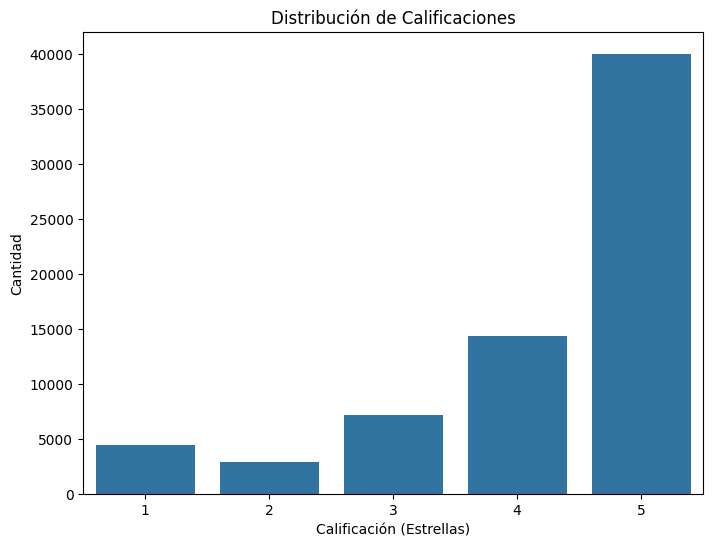

In [14]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=reviews)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación (Estrellas)')
plt.ylabel('Cantidad')
plt.show()

Puede notarse que la mayoría de los usuarios tienden a calificar con 5 estrellas y que la minoría califica con 2.

#### Respuesta a Reseñas (resp)
Usa un gráfico de barras para la columna resp (donde 1 significa que hubo respuesta y 0 que no la hubo) para visualizar qué tan frecuentemente los locales responden a las reseñas.

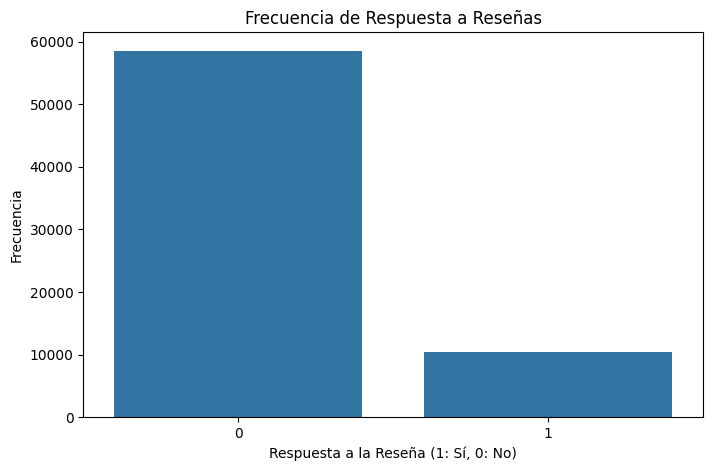

In [15]:
# Convertir valores de `resp` a binarios
reviews['resp'] = reviews['resp'].notna().astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(x='resp', data=reviews)
plt.title('Frecuencia de Respuesta a Reseñas')
plt.xlabel('Respuesta a la Reseña (1: Sí, 0: No)')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los locales no responden a las reseñas.

### Relación entre Reseñas, Respuestas y Calificación
Un violinplot puede ayudar a ver la relación entre rating y si la reseña recibió respuesta (resp), buscando si hay diferencia en la calificación de los usuarios cuando reciben una respuesta.

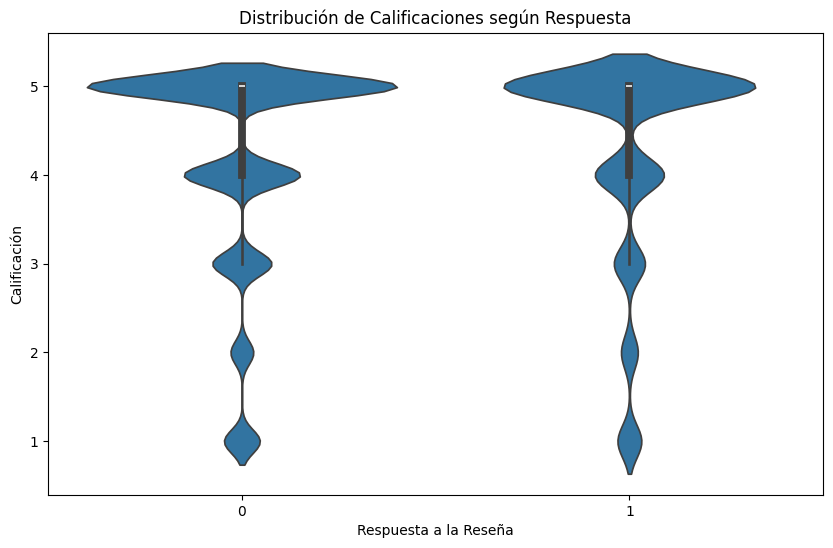

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='resp', y='rating', data=reviews)
plt.title('Distribución de Calificaciones según Respuesta')
plt.xlabel('Respuesta a la Reseña')
plt.ylabel('Calificación')
plt.show()

Las gráficas se ven muy similares, por lo que no hay relación directa entre las respuestas y las calificaciones.

### Análisis Temporal
- Usar time para observar el tiempo que pasa antes de que un usuario haga una reseña.
- Transformar time a una fecha y analizar la frecuencia de reseñas a lo largo del tiempo.

In [25]:
# supongamos que time son la cantidad de segundos que pasaron desde la fecha de publicación de la review hasta ahora
fecha_referencia = datetime.now()

# convertir el tiempo en segundos a datetime restando el tiempo desde la fecha de referencia
reviews['time'] = pd.to_timedelta(reviews['time'], unit='ms')
reviews['time'] = fecha_referencia - reviews['time']

# visualizar primeros elementos
reviews.head(3)

,index,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,latitude,longitude,avg_rating,num_of_reviews,category
0,0,1.015689e+20,Big Fal,1974-06-03 07:50:45.121548,3,"Nice place to hang out, but there's no alcohol...",[{'url': ['https://lh5.googleusercontent.com/p...,None,0x88c2c13828669dbd:0x862542ecd26e0fae,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",28.025932,-82.486247,4.3,108,[hookah bar]
1,1,1.110208e+20,Juan Aldea,1974-01-12 12:37:24.576548,5,It's a great place to go and hang out with you...,None,None,0x88c2c13828669dbd:0x862542ecd26e0fae,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",28.025932,-82.486247,4.3,108,[hookah bar]
2,2,1.058138e+20,Ashley Campis,1976-03-17 17:21:58.925548,4,Fun atmosphere . Great hosts and door men. Loc...,None,None,0x88c2c13828669dbd:0x862542ecd26e0fae,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",28.025932,-82.486247,4.3,108,[hookah bar]


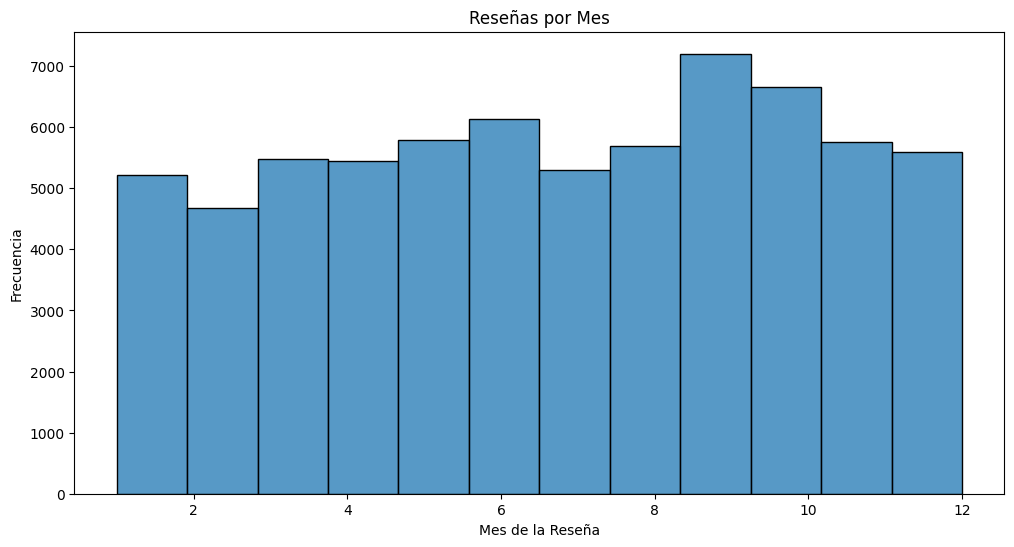

In [26]:
# visualizar reseñas por meses
plt.figure(figsize=(12, 6))
sns.histplot(data=reviews, x=reviews['time'].dt.month, bins=12)

# Personalizar el gráfico
plt.title('Reseñas por Mes')
plt.xlabel('Mes de la Reseña')
plt.ylabel('Frecuencia')
plt.show()

Se nota un aumento de reseñas en septiembre y octubre, siendo la menor cantidad en febrero.

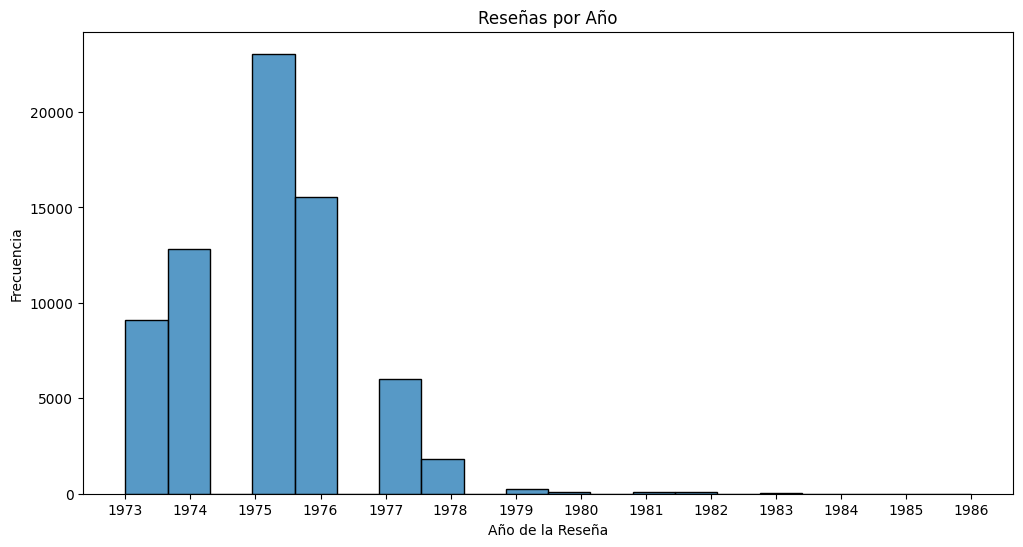

In [27]:
# Visualizar reseñas por año
plt.figure(figsize=(12, 6))
sns.histplot(data=reviews, x=reviews['time'].dt.year, bins=20)

# Personalizar el gráfico
plt.title('Reseñas por Año')
plt.xlabel('Año de la Reseña')
plt.ylabel('Frecuencia')

# Asegurar que los años aparezcan como enteros
plt.xticks(ticks=range(reviews['time'].dt.year.min(), reviews['time'].dt.year.max() + 1))

plt.show()

La mayoría de las reseñas fueron hehcas en 1975 y 1976 disminuyendo drásticamente a partir de esos años.

### Negocios Gastronómicos con más Reviews

In [28]:
negocios = get_frequency(reviews, 'name_y')
negocios.head(20)

,name_y,frequency,percentage
0,Chick-fil-A,3990,5.79
1,Wendy's,3540,5.14
2,Applebee's Grill + Bar,3484,5.05
3,McDonald's,2985,4.33
4,Cracker Barrel Old Country Store,2893,4.20
5,Genghis Grill,2158,3.13
6,American Social,1877,2.72
7,IHOP,1846,2.68
8,Bascom's Chop House,1819,2.64
9,Kobe Japanese Steakhouse,1686,2.45


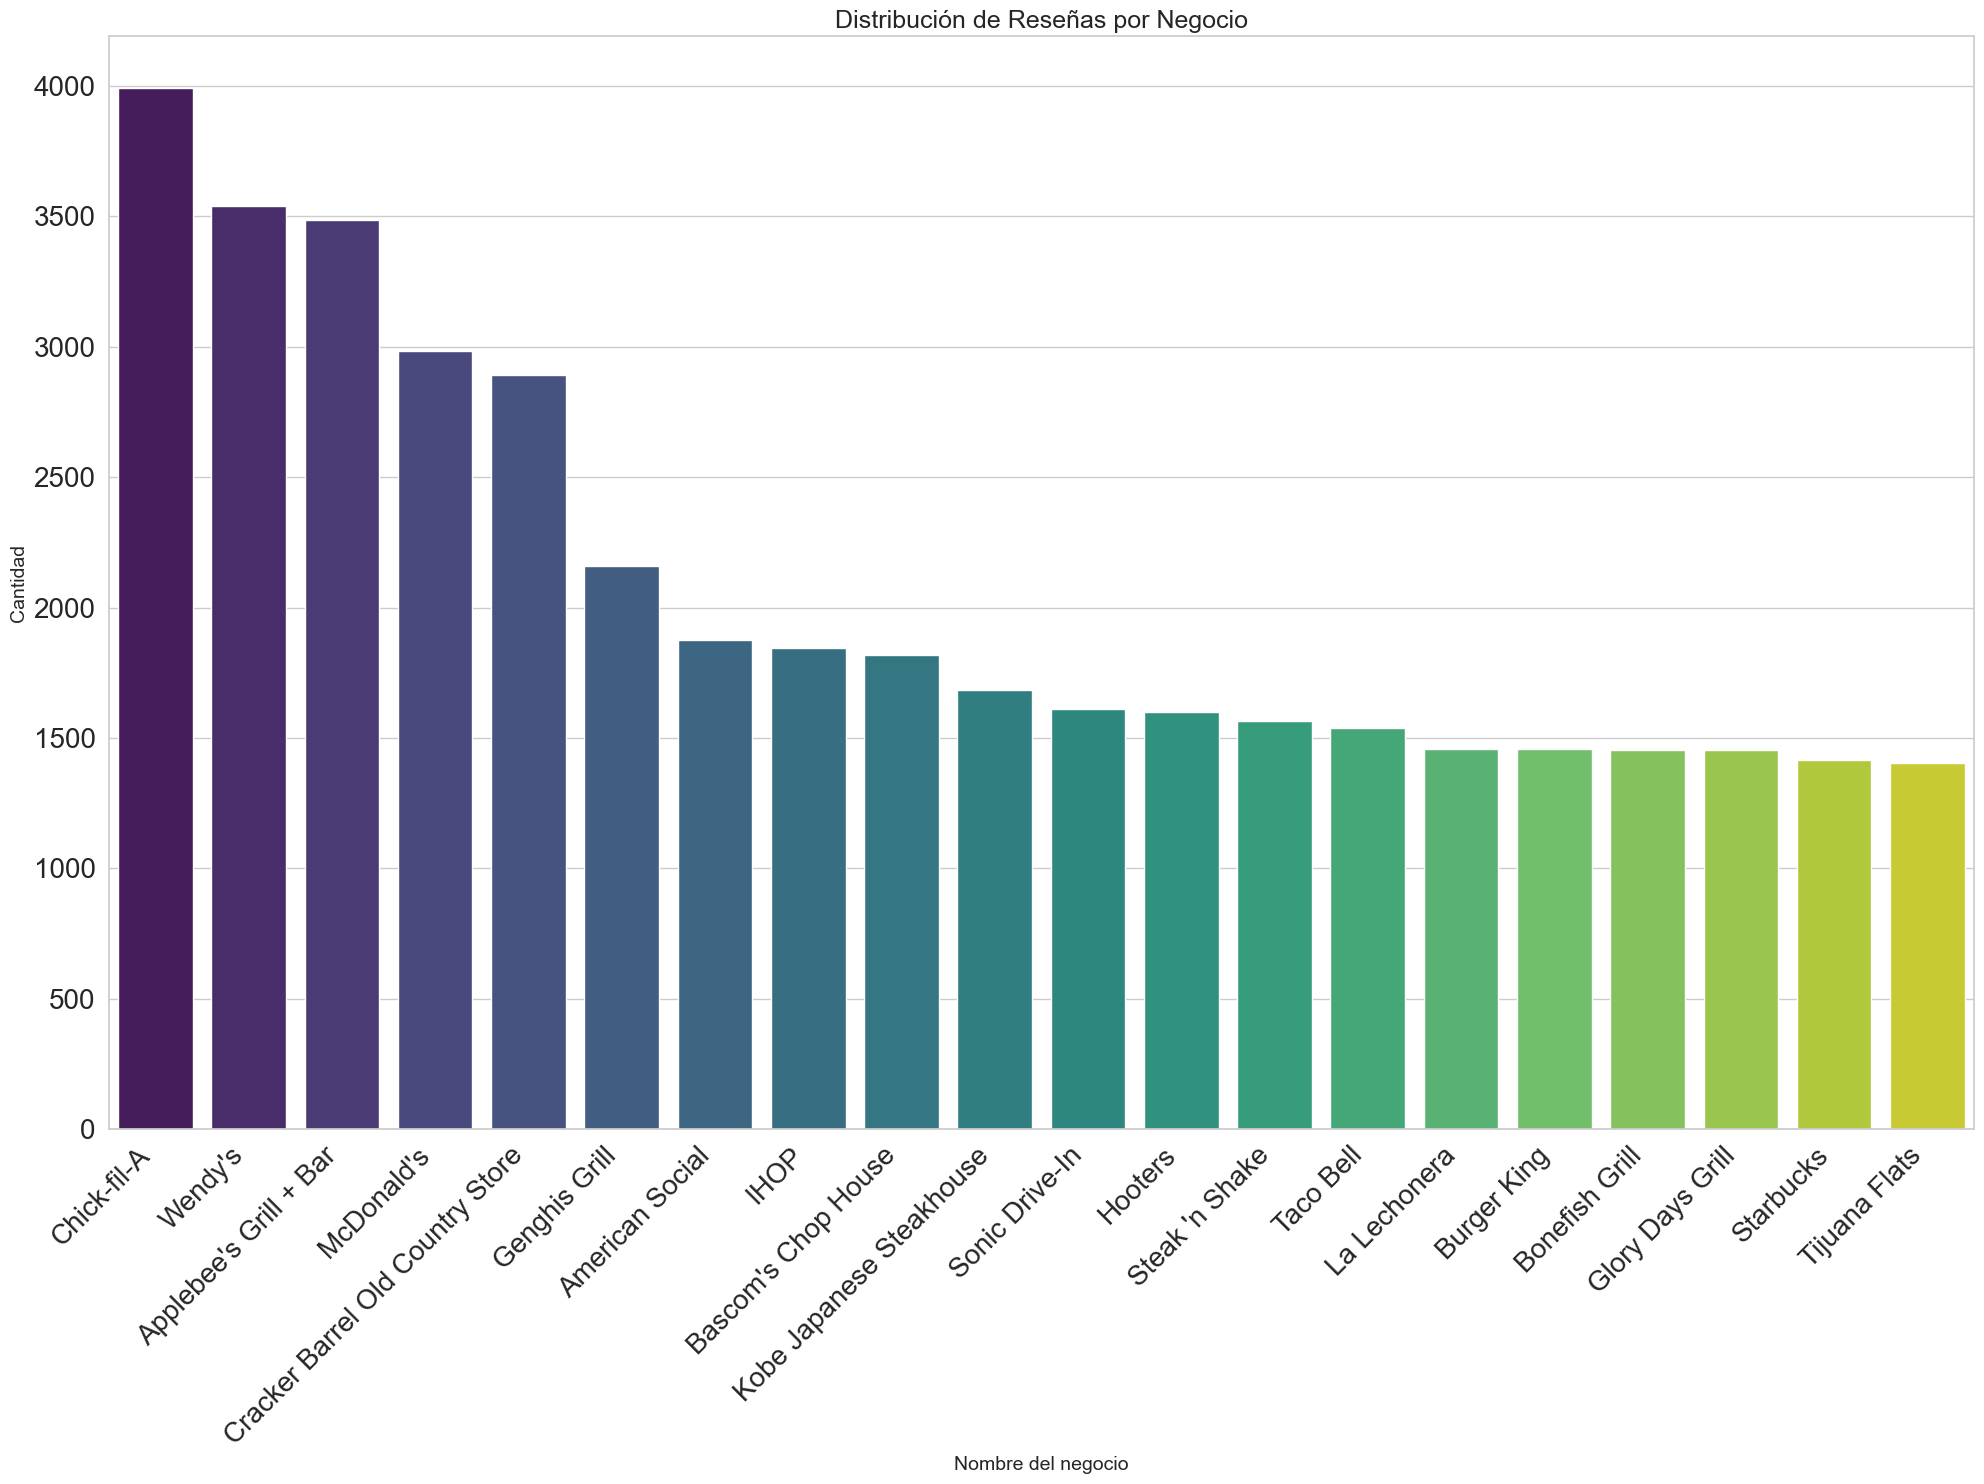

In [29]:
# Gráfico de Barras para ver las categorías más frecuentes
# Configuración del gráfico
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Gráfico de barras con rotación de etiquetas
barplot = sns.barplot(x='name_y', y='frequency', data=negocios.head(20), palette="viridis")
barplot.set_title('Distribución de Reseñas por Negocio', fontsize=18)
barplot.set_xlabel('Nombre del negocio', fontsize=14)
barplot.set_ylabel('Cantidad', fontsize=14)

# Rotar etiquetas de las categorías en el eje X
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha="right", fontsize=20)
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=20)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que los elementos no se sobrepongan
plt.show()

Puede observarse que Chill-fill-A es el local con mayor cantidad de reseñas seguido por Wendy's, Applebee's Grill + Bar, McDonald's y Cracker Barrel Old Country Store.

## Exportar Reviews Unificadas

In [30]:
# Exportar reviews
reviews.to_parquet('../../data/processed/google_maps/reviews.parquet', index=False, compression='gzip')